In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('content/Social_Network_Ads.csv')


In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df[['Age', 'EstimatedSalary', 'Purchased']]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [6]:
print(X.shape)

(400, 2)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=2)
X_train.shape

(320, 2)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential([
    Dense(10,activation='relu',input_dim=2),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')
    ])



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Who is faster?
Ans: **Batch GD**. As it undergoes very less number of updation as compared to Stochastic GD. Let's Check both the cases

In [12]:
# Batch GD: For each epoch, choose all data points, predict, find loss and update parameters
# Number of times  parameters are updated = # Number of epochs
# Uncomment from below
# model.compile(loss='binary_crossentropy', metrics=['accuracy'])
# start = time.time()
# model.fit(X_train, y_train, epochs=10, batch_size=320)  # Batch Gradient Descent --> 1 batch containing all the rows
# end = time.time()
# print('Time taken: ',end - start, 'ms')

In [13]:
# Stochastic GD: For each epoch, choose each data point, predict, find loss and update parameters
# Number of times  parameters are updated =  Number of epochs * Number of data points
# Uncomment from below
# model.compile(loss='binary_crossentropy', metrics=['accuracy'])
# start = time.time()
# model.fit(X_train, y_train, epochs=10, batch_size=1)  # Stochastic GD -> 1 batch containing 1 row. #batch = #rows (320 batches)
# end = time.time()
# print('Time taken: ',end - start, 'ms')

So, the Batch GD is faster than Stochastic GD as it does less number of updations than the latter one. 

### Who is faster to converge towards correct solution of weights and biases?
Ans: **Stochastic GD**. As it undergoes large number of updation as compared to Batch GD, it will converge faster towards correct solution. Let's Check both the cases

In [14]:
# # test for Batch GD ---> Check validation accuracy
# model.compile(loss='binary_crossentropy', metrics=['accuracy'])
# history = model.fit(X_scaled, y, epochs=10, batch_size=400, validation_split=0.2)  # Batch Gradient Descent --> 1 batch containing all the rows


In [15]:
# # plot the loss
# import matplotlib.pyplot as plt
# plt.plot(history.history['loss'])

In [16]:
# # test for stochastic GD ---> Check validation accuracy
# model.compile(loss='binary_crossentropy', metrics=['accuracy'])
# history = model.fit(X_scaled, y, epochs=10, batch_size=1, validation_split=0.2)  # Batch Gradient Descent --> 1 batch containing all the rows

Definitely, when doing Stochastic GD and Batch GD, the validation accuracy is more in the case of Stochastic GD as it does more number of updates than Batch GD

In [17]:
# # plot the loss
# import matplotlib.pyplot as plt
# plt.plot(history.history['loss'])

#### Both of the SGD and BGD has advantages and disadvantages of their own. 

### Mini Batch GD --> mixture of SGD and BGD
Here, we would create small batches of the total dataset. Then for each epoch, select each batch then predict, calculate loss and update params.
For each epoch, select each batch, update the params
Number of updations = Number of epochs * Number of batches

In [18]:
# test for Batch GD ---> Check validation accuracy
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_scaled, y, epochs=10, batch_size=32, validation_split=0.2)  # Batch Gradient Descent --> 1 batch containing all the rows

Epoch 1/10
10/10 [==============================] - 1s 61ms/step - loss: 0.6816 - accuracy: 0.3688 - val_loss: 0.5692 - val_accuracy: 0.7000
Epoch 2/10
10/10 [==============================] - 0s 11ms/step - loss: 0.6689 - accuracy: 0.6094 - val_loss: 0.5656 - val_accuracy: 0.8000
Epoch 3/10
10/10 [==============================] - 0s 8ms/step - loss: 0.6598 - accuracy: 0.7500 - val_loss: 0.5610 - val_accuracy: 0.8250
Epoch 4/10
10/10 [==============================] - 0s 8ms/step - loss: 0.6517 - accuracy: 0.8094 - val_loss: 0.5557 - val_accuracy: 0.8250
Epoch 5/10
10/10 [==============================] - 0s 7ms/step - loss: 0.6431 - accuracy: 0.8344 - val_loss: 0.5501 - val_accuracy: 0.8250
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 0.6336 - accuracy: 0.8469 - val_loss: 0.5439 - val_accuracy: 0.8250
Epoch 7/10
10/10 [==============================] - 0s 9ms/step - loss: 0.6227 - accuracy: 0.8500 - val_loss: 0.5369 - val_accuracy: 0.8625
Epoch 8/10
10/10 [

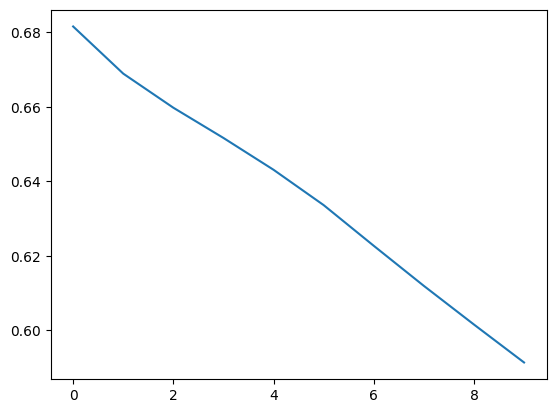

In [19]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])